# Instabilidade no movimento relativístico de partículas num campo eletromagnético não uniforme


* PET- Física
* Petiano: Wallysson Pereira da Silva
* Data: 02/02/2025

$\quad$ O objetivo desse notebook é explorar a instabilidade na trajetória de uma partícula exposta à uma campo eletromagnético não-uniforme. Para tal, a trajetória da partícula será evoluída no tempo por meio de um método de integração por passos. O método utilizado será o Runge-Kutta de Quarta Ordem, onde, naturalmente, se torna necessário que o leitor tenha uma familiaridade. Fora esse pré-requesito, também é interessante que o leitor tenha uma base em relatividade especial. 


$\quad$ O presente `Notebook` será organizado por 3 tópicos principais:

1. Simulação Não-Relativística
2. Simulação Relativística
3. Conclusão

## Importando bibliotecas

In [48]:
import numpy as np
import matplotlib.pyplot as plt


## Informações sobre as bibliotecas

In [49]:
%load_ext version_information
%version_information Matplotlib, Numpy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.13.0 64bit [MSC v.1941 64 bit (AMD64)]
IPython 8.29.0
OS Windows 11 10.0.22631 SP0
Matplotlib 3.9.2
Numpy 2.1.3
Sat Feb 01 16:55:26 2025 Hora oficial do Brasil

# 1. Simulação Não-Relativística

## 1.1 Introdução Teórica

$\quad$ Quando se tem uma partícula carregada imersa em campos elétrico e/ou elétricos, teremos uma força agindo sobre a carga. As características dessa força dependerá da configuração dos campos envolvidos. Caso só haja um campo elétrico uniforme, a partícula terá uma aceleração constante na direção do mesmo, não dependendo de a partícula ter ou não uma velocidade contudo. Contudo, no caso de um campo apenas magnético, a força magnética agindo na partícula tem forte dependência da velocidade inicial da partícula, já que sua definição envolve um produto vetorial entre a mesma e o campo magnético $\vec{B}$.

$\quad$ No caso onde há tanto um campo elétrico quanto um campo megnéticos na região onde a partículas está localizada, defini-se a força eletromagnética (também comumente conhecida com força de lorentz) como

$$ \vec{F} = q\left( \vec{E} + \vec{v}\times \vec{B}\right), \tag{1.1}$$

onde $q$ é a carga elétrica da partícula,  $\vec{E}$ o campo elétrico e $\vec{B}$ o campo magnético. Tal expressão representa a força como dependete da influência de ambos os campos. Também podemos expressar a força através de suas componentes em $F_x$, $F_y$ e $F_z$

$$F_x = q\left[ E_x + \left(\vec{v}\times \vec{B}\right)_x\right] = q\left[ E_x + v_yB_z - v_zB_y\right], $$

$$F_y = q\left[ E_y + \left(\vec{v}\times \vec{B}\right)_y\right] = q\left[ E_y + v_zB_x - v_xB_z\right] \text{ e } $$

$$F_z = q\left[ E_z + \left(\vec{v}\times \vec{B}\right)_z\right] = q\left[ E_z + v_xB_y - v_yB_x\right]. $$

$\quad$ No caso do exemplo analisado nesse material, teremos um campo magnético constante na direção positiva de $z$, ou seja $\vec{B} = B_z\hat{k}$ e um campo elétrico não-constante na direção $x$, determinado por $\vec{E} = \left(E_0 + \epsilon x\right)\hat{i}$, onde $E_0 \in \mathbb{R}$. Pela forma como foi definido, pode-se perceber que $\frac{\partial E_x}{\partial t} = \frac{\partial }{\partial t}\left(E_0 + \epsilon x\right) = \epsilon $, onde tem-se que o fator $\epsilon$ determina o quanto o campo elétrico varia na direção $x$. Já a velocidade da partícula será $\vec{v} = v_x\hat{i}$. 

$\quad$ Tendo em vista essa configuração da velocidade e dos campos (com apenas uma componente não nula cada), podemos simplificar a Equação **(1.1)** para

$$F_x = q\left[ E_x + v_yB_z \right], \ \ F_y = -qv_xB_z \ \ \text{e} \ \ F_z = 0.                        \tag{1.2}$$

$\quad$ Aplicando a Segunda Lei de Newtom para cada componente, obtemos:  

$$ F_x = m a_x \implies a_x = \frac{F_x}{m}  \implies a_x = \frac{q}{m}\left[ E_x + v_yB_z \right], \tag{1.3}$$

$$ F_y = m a_y \implies a_y = \frac{F_y}{m}  \implies a_y = -\frac{q}{m}v_xB_z \ \ \text{e} \tag{1.4}$$

$$ F_z = m a_z \implies a_z = \frac{F_z}{m}  \implies a_z = 0. \tag{1.5}$$

$\quad$ A posição inicial que iremos adotar para a partícula será $\vec{r} = 2\hat{i}$. Portante, como não há aceleração no eixo $z$, iremos desconsiderar essa componente, o que nos possibilita uma simulação da trajetória da partícula utilizando apenas o plano $xy$. Ademais, destacamos o fato de que $\vec{a} = \frac{d \vec{r}}{dt}$ para, a partir de **(1.3)** e **(1.4)**, obter as EDO's

$$\frac{d^2 x_{(t)}}{dt^2}  = \frac{q}{m}\left(E_x + v_yB_z\right) \ \ \text{e} \ \ \frac{d^2 y_{(t)}}{dt^2} = -\frac{q}{m}v_xB_z. \tag{1.6}$$

Utilizando essas Equações Diferenciais de Segunda Ordem para $x$ e $y$ podemos determinar a evolução do sistema. A partir da condição inicial já citada para a posição ($x=2$ e $y=0$), com a adição da condição inicial $v_x = 0.99c$ e $v_y = 0$ para a velocidade, utilizaremos o método de integração por passos Runge-kuttaa de Quarta Ordem para evoluir a trajetória da partícula. 

## 1.2 Implementação

$\quad$ Definindo o campo magnético:

In [50]:
def B(r):
    Bx, By, Bz = 0.0, 0.0, 1.0
    return np.array([Bx,By,Bz], float)

$\quad$ Temos que definir o campo elétrico como tendo um valor mínimo inicialmente. Fazendo $E_0 = 10^{-5}$, teremos:

In [51]:
def E(r, epsilon):
    Ey, Ez = 0.0, 0.0
    E0 = 1e-5
    x = r[0]
    Ex = E0 + epsilon*x
    return np.array([Ex,Ey,Ez], float)

$\quad$ Por motivos de conveniencia na aplicação do Runge-Kutta, definiremos um vetor **r** com um formato de componentes diferente do vetor posição $\vec{r}$. Ele será definido como $r = (x,\frac{d x}{dt},y,\frac{d y}{dt}) = (x, v_x, y, v_y)$. Também já nos será conveniente já criar a função com a variável **epsilon** inclusa. Assim, utilizando as Equações Diferenciais Ordinárias de **(1.6)** para definir a seguinte função:

In [52]:
def f(r,t, epsilon):
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    E_field = E(r, epsilon)
    B_field = B(r)
    Bz = B_field[2]
    Ex = E_field[0]
        
    fx = vx
    fvx = (q/m)*(Ex+vy*Bz)
    fy = vy
    fvy = -(q/m)*(vx*Bz)
    
    return np.array([fx,fvx, fy, fvy], float)

$\quad$ Método Runge-Kutta de Quarta Ordem:

In [53]:
def R4K(r,t,dt, epsilon):
    k1 = dt*f(r,t, epsilon)
    k2 = dt*f(r + 0.5*k1,t + 0.5*dt, epsilon)
    k3 = dt*f(r + 0.5*k2, t + 0.5*dt, epsilon)
    k4 = dt*f(r + k3, t + dt, epsilon)
    return r + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

$\quad$ Definindo a função:

$\quad$ Constantes:

In [54]:
c = 1.0 # Velocidade da Luz
m = 1.0 # Massa da partícula
q = 1.0 # Carga da partícula

$\quad$ Começaremos evoluindo e plotando a trajetória de uma partícula para a condição do parâmetro $\epsilon = 0.0$. Ou seja, o campo elétrico será constante com módulo $|\vec{E}| = 10^{-5}$ na direção de $x$. Durante esse e os seguintes códigos, estarei ajustando a variável **tf** de modo que a visualização fique satisfatória.

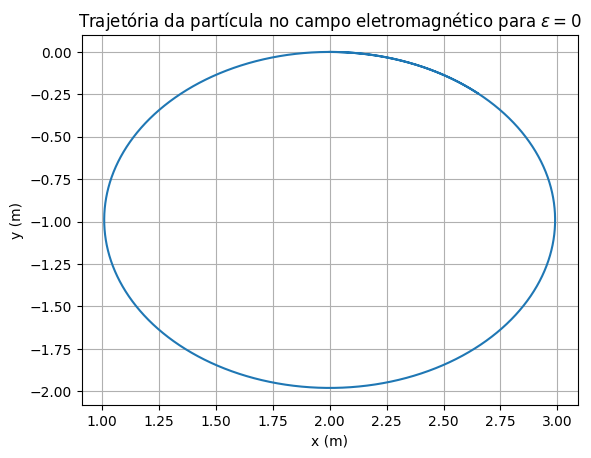

In [80]:
x, vx, y, vy = 2.0, 0.99, 0.0, 0.0 # r = (x,vx,y,vy); condição inicial.
    
ti = 0 # Tempo Inicial.
tf = 7 # Tempo final.
N = 50000 # Quantidade de passos.
ts = np.linspace(ti,tf,N) # Discretização do tempo.
dt = ts[1]-ts[0] # Passo de tempo.


epsilon = 0 # Parâmetro.

r = np.array([x,vx,y,vy], float) # vetor com a condição inicial.

x_points = [r[0]] # Lista para armazenar os pontos x, já inicializado com o valor inicial de x.
y_points = [r[2]] # Lista para armazenar os pontos y, já inicializado com o valor inicial de y.

for t in ts:
    r = R4K(r,t,dt, epsilon) # Atualizar o valor de r(t) -> r(t+dt) pelo método de Runge-Kutta.
    x_points.append(r[0]) # Armezenar o vamor atual de x.
    y_points.append(r[2]) # Armezenar o vamor atual de y.
    

# Plotagem da Solução
plt.plot(x_points, y_points)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.title(fr'Trajetória da partícula no campo eletromagnético para $\epsilon = {epsilon}$')
plt.show()

$\quad$ Como esperado, já que ambos os campos são constantes, a trajetória é uma circunferência (nesse caso de raio 2). Vamos repetir o mesmo processo de atualização da trajetória para diferentes valores de $\epsilon$>0, partindo da mesma condição inicial. 

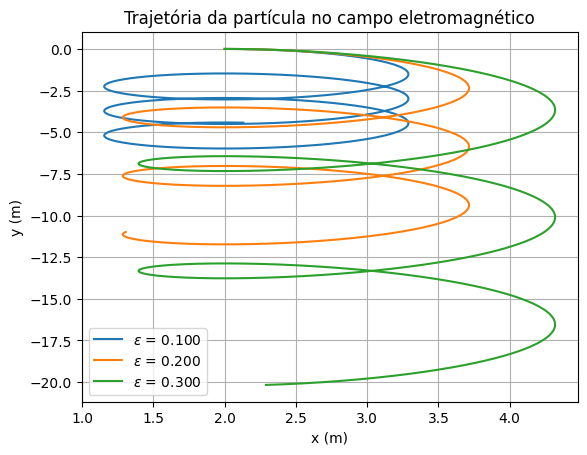

In [79]:
epsilon_values = [0.1, 0.2, 0.3] # Valores do epsilon analizados.

tf = 20 # Tempo Final.
ts = np.linspace(ti,tf,N) # Discretização do tempo.
dt = ts[1]-ts[0] # Tamanho do passo temporal.

for epsilon in epsilon_values: # Analisar o comportamento da trajetória para cada valor de epsilon. 
    r = np.array([x,vx,y,vy], float)  #Condição inicial.
    x_points = [r[0]] 
    y_points = [r[2]]

    for t in ts: # Evoluir a partícula para esse valor de epsilon.
        r = R4K(r,t,dt, epsilon) # Evooluir a posição r(t) -> r(t+dt)
        x_points.append(r[0]) # Armazenar o atual valor de x(t).
        y_points.append(r[2]) # Armazenar o atual valor de y(t).
    

    plt.plot(x_points, y_points, label= rf'$\epsilon$ = ${epsilon:.3f}$')
    

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ Assim percebemos que aumentar o valor do parâmetro $\epsilon$ resulta numa maior oscilação espacial da partícula, com uma trajetória visivelmente periódica.

$\quad$ Em alguns gráficos desse `Notebook` será interessante a representação da força instantânea atuante na partícula. Para tal, vamos utilizar as duas primeiras Equações presentes em **(1.2)**,

$$F_x = q\left[ E_x + v_yB_z \right] \ \ \text{e} \ \ F_y = -qv_xB_z,$$

para ilustrar a força através de um campo vetorial, escolhendo determinados valores de $\vec{r}$ para aplicar $\vec{F}_{(\vec{r})} = F_x\hat{i} + F_y\hat{j}$. Definindo a função:

In [57]:
def Force(r, epsilon):
    vx = r[1]
    vy = r[3]
    E_field = E(r, epsilon)
    B_field = B(r)
    Bz = B_field[2] # Componente z do campo magnético.
    Ex = E_field[0] # Componente x do campo elétrico.

    fx = q*(Ex+vy*Bz)
    fy = -q*vx*Bz

    return np.array([fx,fy], float)

$\quad$ Escolhendo arbitrariamente o valor $\epsilon = 0.200$, podemos desenvolver o seguinte código para ilustrar a força agindo sobre a partícula em determinados pontos da trajetória.

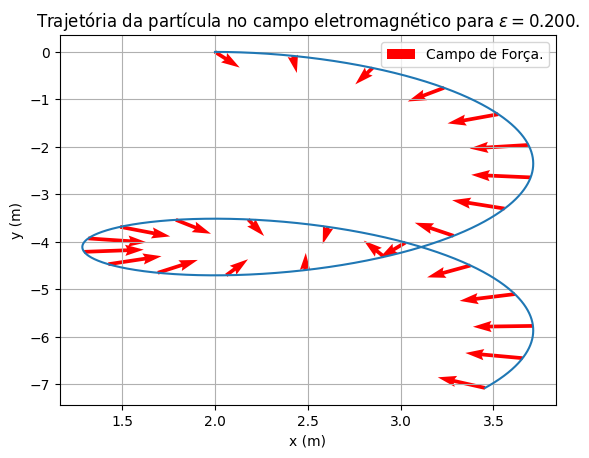

In [82]:
tf = 10 # Tempo final.
ts = np.linspace(ti,tf,N) # Discretização temporal.
dt = ts[1]-ts[0] # Passo de tempo.

epsilon = 0.200 # Valor de epsilon

r = np.array([x,vx,y,vy], float)   
x_points = [r[0]]
y_points = [r[2]]

o = 0 # Contador.
for t in ts:
    r = R4K(r,t,dt, epsilon)
    x_points.append(r[0])
    y_points.append(r[2])
    
    if o%2000 == 0: # Condição para plotar o vetor força para apenas alguns valores da trajetória.
        plt.quiver(r[0], r[2], Force(r,epsilon)[0], Force(r,epsilon)[1], angles='xy', scale_units='xy', scale=3, color='r') # Plot do vetor.
    o+=1 

# Plot paraa adicionar a legenda.
plt.quiver(r[0], r[2], Force(r,epsilon)[0], Force(r,epsilon)[1], angles='xy', scale_units='xy', scale=3, color='r', label = "Campo de Força.")

plt.plot(x_points, y_points)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.legend()
plt.title(rf'Trajetória da partícula no campo eletromagnético para $\epsilon = {epsilon:.3f}$.')
plt.show()

$\quad$ Onde percebemos que a repreentação da força estsá de acordo com a trajetória descrita pela partícula.

$\quad$ Uma característica para esse exemplo é que, para valores de $\epsilon \geq 1$ a trajetória da partícula deixa de ser oscilatória, se dornando uma trajetória instável. Vamos ilustrar esse comportamento plotando a trajetória para os valores $\epsilon \in $ {0.900, 0.950, 1.00}.

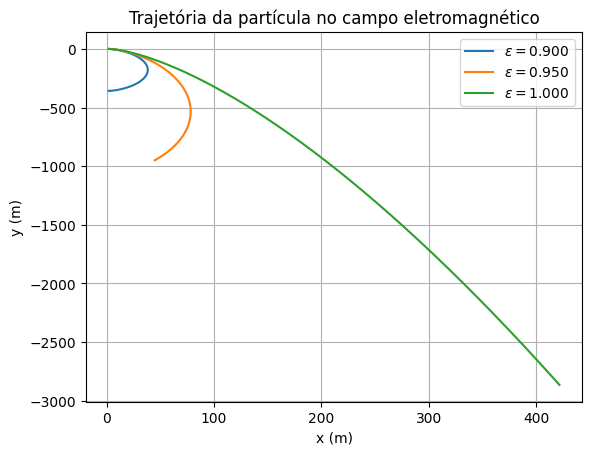

In [84]:
tf = 20 # Tempo final.
ts = np.linspace(ti,tf,N) # Discretização do tempo.
dt = ts[1]-ts[0] # Passo de tempo.

epsilon_values = [0.900, 0.950, 1] # Parâmetro.

for epsilon in epsilon_values:
    r = np.array([x,vx,y,vy], float) # vetor com a condição inicial.

    x_points = [r[0]] # Lista para armazenar os pontos x, já inicializado com o valor inicial de x.
    y_points = [r[2]] # Lista para armazenar os pontos y, já inicializado com o valor inicial de y.    

    for t in ts:
        r = R4K(r,t,dt, epsilon) # Atualizar o valor de r(t) -> r(t+dt) pelo método de Runge-Kutta.
        x_points.append(r[0]) # Armezenar o vamor atual de x.
        y_points.append(r[2]) # Armezenar o vamor atual de y.
    
    plt.plot(x_points, y_points, label = rf'$\epsilon = {epsilon:.3f}$')        

# Plotagem da Solução
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ Buscando compreender qual o comportamento da força para ocasionar tal instabilidade, representamos a trajetória junto com o campo de forças tanto para a força quanto para a velocidade ($\vec{v}_{(\vec{r})} = v_x\hat{i} + v_y\hat{j}$).

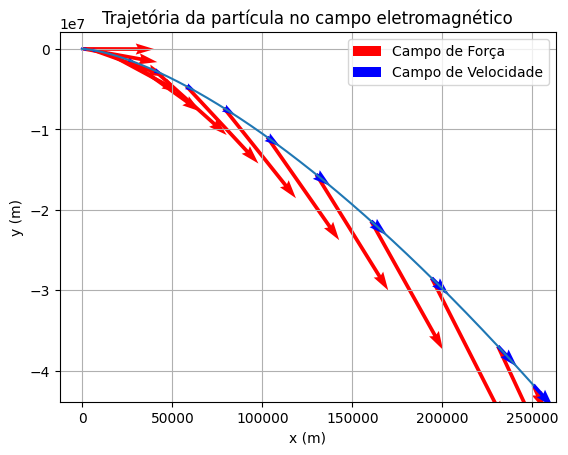

In [60]:
tf = 500 # Tempo final.
ts = np.linspace(ti,tf,N) # Discretização temporal.
dt = ts[1]-ts[0] # Passo temporal.

epsilon = 1 #

r = np.array([x,vx,y,vy], float)  # Vetor r com a condição inicial. 

x_points = [] # Lista para armazenar os valores de x.
y_points = [] # Lista para armazenar os valores de x.
force_x_values = [] # Lista para armazenar os valores de fx.
force_y_values = [] # Lista para armazenar os valores de fy.

o = 0 # Contador
for t in ts:
    r = R4K(r,t,dt, epsilon)
    x_points.append(r[0])
    y_points.append(r[2])
    force_x_values.append(Force(r,epsilon)[0])
    force_y_values.append(Force(r,epsilon)[1])

    if o%4000 == 0: # Condição para plotar a força e velocidade para apenas alguns valores de r.
        plt.quiver(r[0], r[2],Force(r,epsilon)[0], Force(r,epsilon)[1], angles='xy', scale_units='xy', scale=0.00005, color='r')
        plt.quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b')
    o+=1 

plt.quiver(r[0], r[2], Force(r,epsilon)[0], Force(r,epsilon)[1], angles='xy', scale_units='xy', color='r', label = "Campo de Força") # Plot apenas para adicionar a legenda. 
plt.quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b', label = "Campo de Velocidade") # Plot apenas para adicionar a legenda.

#Plotagem da trajetória.
plt.plot(x_points, y_points)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ A figura acima não nos dá muito bem a dimensão do que está acontecendo com a força nem com a futura trajetória da partícula (para valores **t** > **tf**), pois, apesar de trajetória divergente da partíocula, podia-se argumentar que só não houve tempo da partícula iniciar o movimento curvilínio oscilatório (mesmo que tenha sido usado um tempo final bem alto). Destacado isto, plotaremos o valor das componentes da força em função do tempo (primeiro isoladamentos, depois juntas num mesmo gráfico, para se ter uma noção da escala entre elas). 

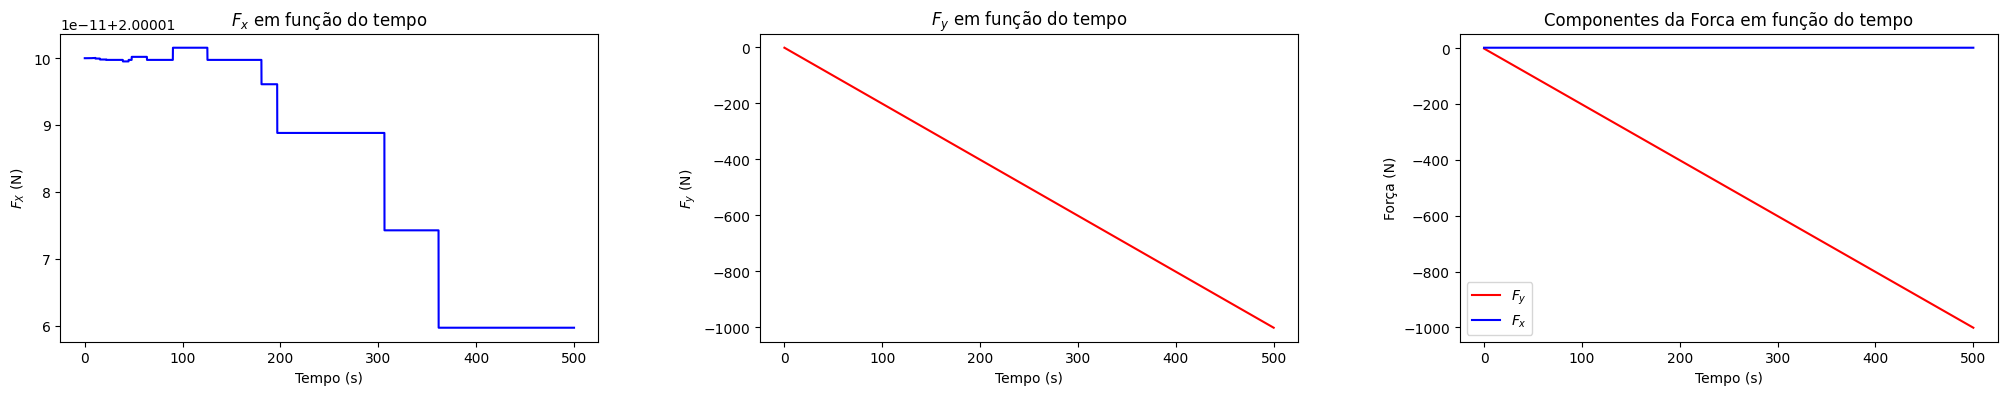

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4))  # 1 linha, 3 colunas

axes[0].plot(ts, force_x_values, color='b')
axes[0].set_title(f'$F_x$ em função do tempo')
axes[0].set_xlabel("Tempo (s)")
axes[0].set_ylabel(f'$F_X$ (N)')

axes[1].plot(ts, force_y_values, color='r')
axes[1].set_title(f'$F_y$ em função do tempo')
axes[1].set_xlabel("Tempo (s)")
axes[1].set_ylabel(f'$F_y$ (N)')

axes[2].plot(ts, force_y_values, color='r', label = f'$F_y$')
axes[2].plot(ts, force_x_values, color='b', label = f'$F_x$')
axes[2].set_title(f'Componentes da Forca em função do tempo')
axes[2].set_xlabel("Tempo (s)")
axes[2].legend()
axes[2].set_ylabel("Força (N)")

plt.subplots_adjust(wspace=0.3)
plt.show()

$\quad$ O gráfico nos deixa claro que a compontente $F_y$ da força cresce (em módulo) indefinidamente, enquanto a componente $F_x$ vai cada vez mais ficando com influência desprezível na força resultante. Logo, o comportamento da força se encaixa com o comportamento da trajetória da partícula, que não entrou num movimento osclatório como nos casos anteiores, justamente porque a força resultante a uma direção exclusivamente vertical. 

$\quad$ Um último clássico gráfico que podemos traçar é o do módulo da velocidade em função do tempo. A partir da imagem anteior, espera-se que o módulo da velocidade aumente indefinidamente desde o início, fato que é justametne o que se observa-se na imagem abaixo.

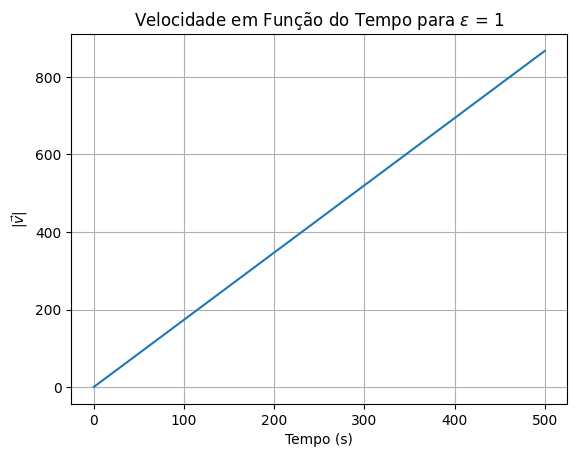

In [62]:
r = np.array([x,vx,y,vy], float)  # Vetor r com a condição inicial. 
velocidade_values = []

for t in ts:
    r = R4K(r,t,dt, epsilon)
    vel = (r[1]**2 + r[3])**(1/2)
    velocidade_values.append(vel)

#Plotagem da trajetória.
plt.plot(ts, velocidade_values)
plt.xlabel('Tempo (s)')
plt.ylabel(r'$|\vec{v}|$')
plt.title(r'Velocidade em Função do Tempo para $\epsilon$ = 1')
plt.grid()
plt.show()

# 2. Simulação Relativística

$\quad$ Na relatiidade, a aceleração sofrida por uma partícula devido a ação de uma força $\vec{F}$ é definida como **[2]**

$$ \vec{a} = \frac{\vec{F}}{m_0\gamma} - \frac{\vec{v}}{m_0\gamma c^2}\left( \vec{F} \cdot \vec{v} \right), \tag{2.1}$$

onde $m_0$ é a massa de respouso da partícula e $\gamma$ é o fator de lorentz, definido como $\gamma = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}}$. Os restantes dos símbolos tem seus significados padrões. A partir dessa definição, podemos desenolver expressões relativísticas para $\frac{dt^2 x_{(t)}}{dt^2}$ e $\frac{dt^2 y_{(t)}}{dt^2}$, já adaptando para nosso exemplo, com os determinados campos tendo apenas sua respectiva componente. Assim, primeiro desenvolvendo o termo o produto interno de **[2.1]** de separadamente:

$$ \vec{F}\cdot \vec{v} = \left[ \left( F_x\hat{i} + F_y\hat{j} + F_z\hat{k}\right) \cdot \left( v_x\hat{i} + v_y\hat{j} + v_z\hat{k}\right)\right] = F_xv_x + F_yv_y + F_zv_z,$$

mas a mesma análise feita anteriormente vale, onde ambos $F_z$ e $v_z$ serão igual a zero, então

$$ \vec{F}\cdot \vec{v} = F_xv_x + F_yv_y.$$

Utilizando os valores das componentes expostos em **[1.2]**, obtemos

$$ \vec{F}\cdot \vec{v} = q\left[ E_x + v_yB_z \right]v_x - qv_xB_zv_y = qE_xv_x + qv_yB_zv_x - qv_xB_zv_y  \ \therefore \ \boxed{\vec{F}\cdot \vec{v} = qE_xv_x}.$$

Substituindo o valor do produto escalar obtido em **[2.1]** e desenvolvendo para cada componente

$$ \frac{d^2 x_{(t)}}{dt^2} = \frac{F_x}{m_0\gamma} - \frac{v_x}{m_0\gamma c^2}qE_xv_x = \frac{q\left[ E_x + v_yB_z \right]}{m_0\gamma} - \frac{v_x}{m_0\gamma c^2}qE_xv_x = \frac{q}{m_0\gamma} \left[E_x + v_yB_z - \frac{v_x^2E_x}{c^2}    \right] $$

$$\text{e}\ \ \frac{d^2 y_{(t)}}{dt^2} = \frac{F_y}{m_0\gamma} - \frac{v_y}{m_0\gamma c^2}qE_xv_x  = \frac{\left(-qv_xB_z\right)}{m_0\gamma} - \frac{v_y}{m_0\gamma c^2}qE_xv_x = -\frac{q}{m_0\gamma} \left[v_xB_z +\frac{v_xv_yE_x}{c^2} \right].$$

Utilizando $\frac{1}{\gamma} = \frac{1}{\frac{1}{\sqrt{1-\frac{v^2}{c^2}}}} = \sqrt{1-\frac{v^2}{c^2}}$, as expressões ainda podem ser escritas como

$$ \frac{d^2 x_{(t)}}{dt^2} = \frac{q}{m_0}\sqrt{1-\frac{v^2}{c^2}}\left(E_x + v_yB_z - \frac{v_x^2E_x}{c^2} \right) \ \ \text{e} \ \ \frac{d^2 y_{(t)}}{dt^2} = -\frac{q}{m_0}\sqrt{1-\frac{v^2}{c^2}}\left(v_xB_z + \frac{v_xv_yE_x}{c^2} \right). \tag{2.2}$$

## 2.2 Implementação

$\quad$ Implementando a função que será utilizada como base para a atualização da posição (utilizando o Runge-Kutta): 

In [63]:
def frel(r,t, epsilon):
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    E_field = E(r, epsilon)
    B_field = B(r)
    Bz = B_field[2]
    Ex = E_field[0]

    v = np.sqrt(vx**2 + vy**2)
    
    fator = np.sqrt(1-(v**2)/(c**2))
    
    fx = vx
    fvx = (q/m)*fator*(Ex + vy*Bz-((vx**2)*Ex)/(c**2))
    fy = vy
    fvy = -(q/m)*fator*(vx*Bz+ (vx*vy*Ex)/(c**2))

    return np.array([fx, fvx, fy, fvy])    

$\quad$ Definindo uma nova função para o Runge-Kutta, considerando agora a nova função de atualização.

In [64]:
def R4Krel(r,t,dt,epsilon):
    k1 = dt*frel(r,t, epsilon)
    k2 = dt*frel(r + 0.5*k1,t + 0.5*dt,epsilon)
    k3 = dt*frel(r + 0.5*k2, t + 0.5*dt,epsilon)
    k4 = dt*frel(r + k3, t + dt,epsilon)
    return r + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

$\quad$ Assim como no primeiro plot realizado para o caso não-relativístico, iremos começar com um plot de uma situação simplificada. Evoluindo a trajetória da partícula utulizando as mesmas condições iniciais, vamos utilizar primeiro um  $\epsilon = 0$. 

C:\Users\noky2\AppData\Local\Temp\ipykernel_15196\45445278.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


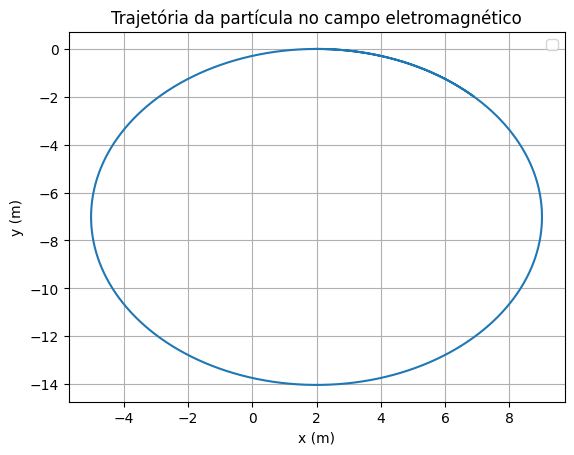

In [65]:
tf = 50 # Tempó Final.
ts = np.linspace(ti,tf,N) # Discretização do tempo.
dt = ts[1]-ts[0] # Passo de tempo.

epsilon = 0 # Parêmtros

r = np.array([x,vx,y,vy], float) # Vetor r com a condição inicial.   

x_points = [r[0]] 
y_points = [r[2]]
    
for t in ts:
    r = R4Krel(r,t,dt, epsilon)

    x_points.append(r[0])
    y_points.append(r[2])
    

plt.plot(x_points, y_points)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ Não se observa nenhum comportamento singular para esse caso simples. Vamos utilizar agora os valores de $\epsilon \in $ {0.100, 0.200, 0.300}.

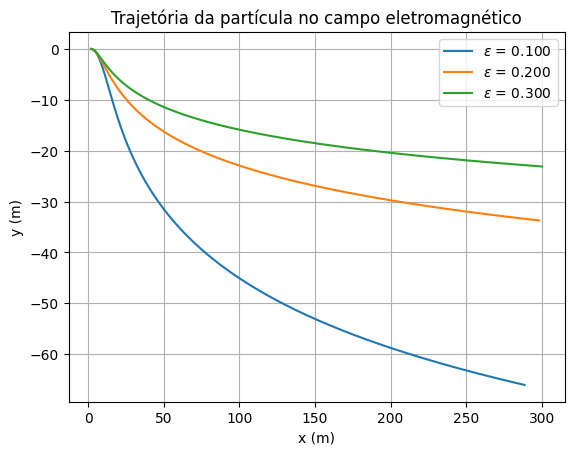

In [85]:
epsilon_values = [0.1, 0.2, 0.3]


tf = 300 # Segundos
ts = np.linspace(ti,tf,N)
dt = ts[1]-ts[0]


for epsilon in epsilon_values:
    r = np.array([x,vx,y,vy], float)   
    x_points = [r[0]]
    y_points = [r[2]]
    
    for t in ts:
        r = R4Krel(r,t,dt, epsilon)
        x_points.append(r[0])
        y_points.append(r[2])
    

    plt.plot(x_points, y_points, label= rf'$\epsilon$ = ${epsilon:.3f}$')


plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ Podemos já perceber um comportamento muito diferente do gráfico análogo no caso não-relativístico, onde não se tem o mínimo sinal de que a partícula vai entrar num movimento períodico. Mas, novamente, para a melhor análise da situação, precisamos analisar a evolução da força (mais precisamente de suas componentes) no tempo, buscando traçar algum paralelo entre os gráficos da trajetória e da força. 

$\quad$ Visando tal feito, dessa vez a partir de **[2.2]**, podemos definir uma equação para a força instantânea sentida pela partícula, de maneira análoga a como fizemos no tópico anterior. Assim vamos utilizar 

$$ F_x = q\sqrt{1-\frac{v^2}{c^2}}\left(E_x + v_yB_z - \frac{v_x^2E_x}{c^2} \right) \ \ \text{e} \ \ F_y = q\sqrt{1-\frac{v^2}{c^2}}\left(v_xB_z + \frac{v_xv_yE_x}{c^2} \right) \tag{2.3}$$

tanto para representar a força através de um campo vetorial ($\vec{F}_{(\vec{r})}$) quanto para armazenar os valores da força em cada valor de tempo e depois plotar um gráfico dela em função do tempo. A função será

In [67]:
def ForceRel(r,epsilon):
    x = r[0]
    y = r[2]
    vx = r[1]
    vy = r[3]
    E_field = E(r,epsilon)
    B_field = B(r)
    Bz = B_field[2]
    Ex = E_field[0]

    v = np.sqrt(vx**2 + vy**2)
    
    fator = np.sqrt(1-(v**2)/(c**2))
    
    fx = q*fator*(Ex + vy*Bz-((vx**2)*Ex)/(c**2))
    fy = -q*fator*(vx*Bz+ (vx*vy*Ex)/(c**2))

    return np.array([fx,fy], float)

$\quad$ Analizar a evolução da força para os três casos (de $\epsilon = $ $0.1$, $0.2$ e $0.3$) simultaneamente seria visualmente ineficiente, logo, devemos escolher um desses valores e focar numa análise separada. Escolhendo $\epsilon = 0.100$, desenvolvemos os plots:

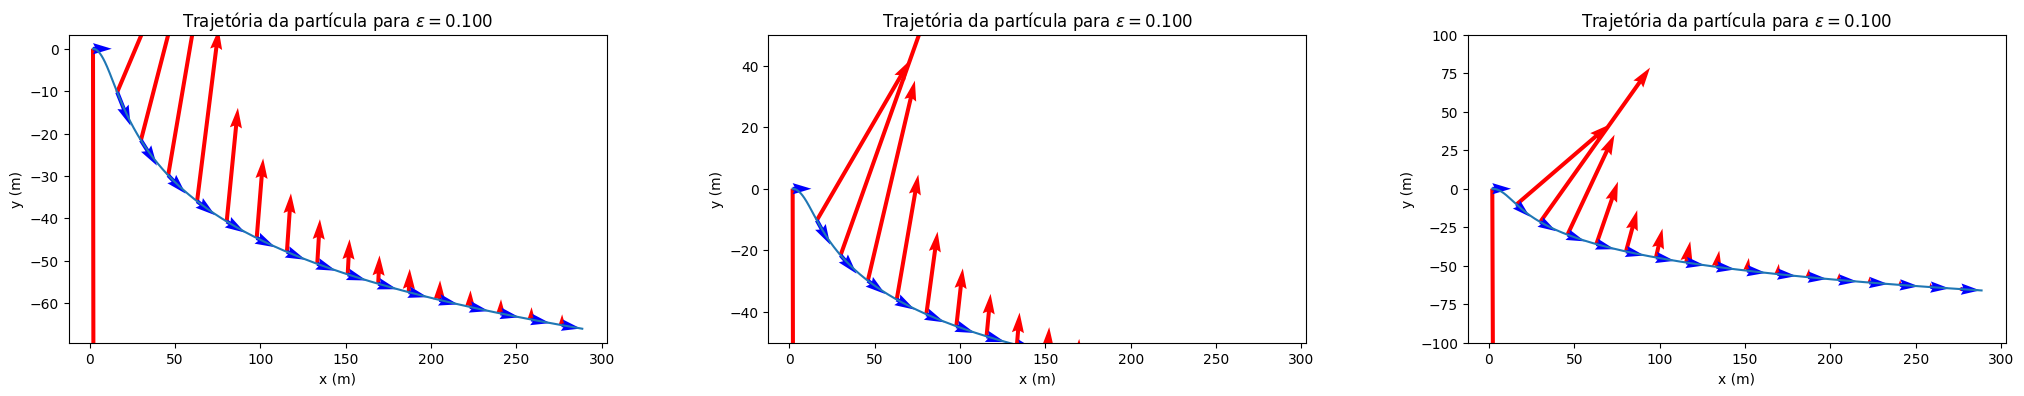

In [86]:
epsilon = 0.100

r = np.array([x,vx,y,vy], float)   
x_points = [r[0]]
y_points = [r[2]]

fig, axes = plt.subplots(1, 3, figsize=(25, 4))  # 1 linha, 3 colunas.

o = 0
for t in ts:
    r = R4Krel(r,t,dt, epsilon)
    x_points.append(r[0])
    y_points.append(r[2])

    if o%3000 == 0:
        axes[0].quiver(r[0], r[2], ForceRel(r,epsilon)[0], ForceRel(r,epsilon)[1], angles='xy', scale_units='xy', scale=0.0001, color='r')
        axes[0].quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b')
        
        axes[1].quiver(r[0], r[2], ForceRel(r,epsilon)[0], ForceRel(r,epsilon)[1], angles='xy', scale_units='xy', scale=0.0001, color='r')
        axes[1].quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b')
        
        axes[2].quiver(r[0], r[2], ForceRel(r,epsilon)[0], ForceRel(r,epsilon)[1], angles='xy', scale_units='xy', scale=0.0001, color='r')
        axes[2].quiver(r[0], r[2], r[1], r[3], angles='xy', scale_units='xy', scale=0.09, color='b')



    o+=1

axes[0].plot(x_points, y_points)
axes[0].set_title(rf'Trajetória da partícula para $\epsilon = {epsilon:.3f}$')
axes[0].set_xlabel("x (m)")
axes[0].set_ylabel("y (m)")


axes[1].plot(x_points, y_points)
axes[1].set_title(rf'Trajetória da partícula para $\epsilon = {epsilon:.3f}$')
axes[1].set_xlabel("x (m)")
axes[1].set_ylabel("y (m)")
axes[1].set_ylim(-50,50)

axes[2].plot(x_points, y_points)
axes[2].set_title(rf'Trajetória da partícula para $\epsilon = {epsilon:.3f}$')
axes[2].set_xlabel("x (m)")
axes[2].set_ylabel("y (m)")
axes[2].set_ylim(-100,100)

plt.subplots_adjust(wspace=0.3)
plt.show()

$\quad$ A partir de uma visualização qualitativa, podemos perceber que a força no início da trajetória é gingante em módulo, tendo uma direção vertical e sentido para baixo, fato que faz com que a partícula inicie a trajetória indo para baixo. Um pouco mais à frente, o sentido da força já se inverte, também diminuindo o módulo à medida que a trajetória avança. Passado um tempo, a força aparenta tender a zero, fato que faz com que a partícula ssiga um caminho reto, já que a força agindo sobre ela será nula. Contudo, por razões de escalas, os gráficos anteriores só nos dão uma noção mais precisa da direção, também nos oferencendo uma análise comparativa do módulo da força em direntes pontos da trajetória. Isto é, só sabemos que a força inicia grande mas vai deminuindo, mas não sabemos o quão influente (qual a magnetude de seu módulo) ela está sendo. Assim, torna-se mais interessante Traçar um gráfico da Força $\times$ Tempo, observando tanto a escala como a evolução da força.

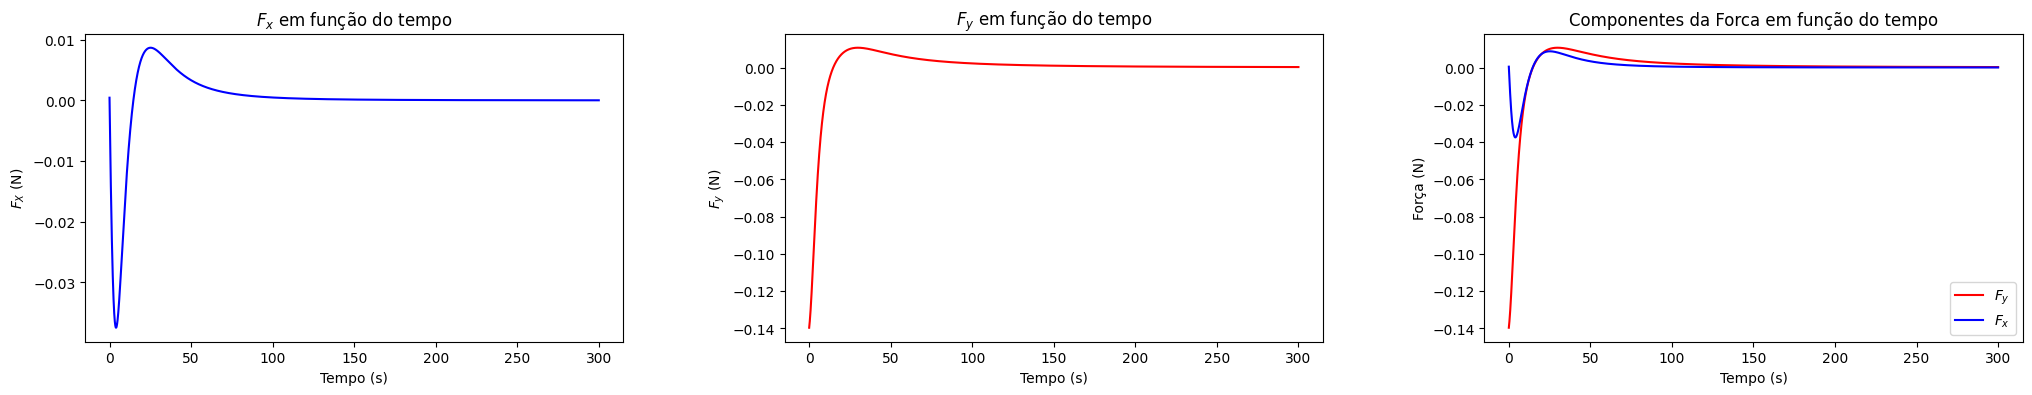

In [69]:
r = np.array([x,vx,y,vy], float)   
force_x_values = []
force_y_values = []


for t in ts:
    r = R4Krel(r,t,dt, epsilon)
    force_x_values.append(ForceRel(r,epsilon)[0])
    force_y_values.append(ForceRel(r,epsilon)[1])


fig, axes = plt.subplots(1, 3, figsize=(25, 4))  # 1 linha, 3 colunas

axes[0].plot(ts, force_x_values, color='b')
axes[0].set_title(f'$F_x$ em função do tempo')
axes[0].set_xlabel("Tempo (s)")
axes[0].set_ylabel(f'$F_X$ (N)')

axes[1].plot(ts, force_y_values, color='r')
axes[1].set_title(f'$F_y$ em função do tempo')
axes[1].set_xlabel("Tempo (s)")
axes[1].set_ylabel(f'$F_y$ (N)')

axes[2].plot(ts, force_y_values, color='r', label = f'$F_y$')
axes[2].plot(ts, force_x_values, color='b', label = f'$F_x$')
axes[2].set_title(f'Componentes da Forca em função do tempo')
axes[2].set_xlabel("Tempo (s)")
axes[2].legend()
axes[2].set_ylabel("Força (N)")

plt.subplots_adjust(wspace=0.3)
plt.show()

$\quad$ Onde obtemos que a força realmente tem uma variação brusca no início da trajetoória, mas depois de um tempo ambas as componentes tendem a zero. Para uma visualização completa, também vamos traçar um gráfico da velocidade em função do tempo.

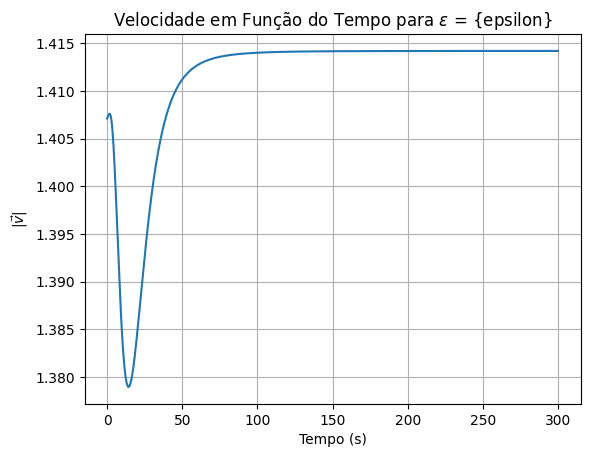

In [70]:
r = np.array([x,vx,y,vy], float)   
velocidade = []

for t in ts:
    vel = (r[1]*2 +r[3]**2)**(1/2)
    velocidade.append(vel)  
    r = R4Krel(r,t,dt, epsilon)

plt.plot(ts, velocidade)
plt.xlabel('Tempo (s)')
plt.ylabel(r'$|\vec{v}|$')
plt.title(rf'Velocidade em Função do Tempo para $\epsilon$ = {epsilon}')
plt.grid()
plt.show()

$\quad$ Esse último gráfico nos deixa claro que a velocidade da partícula adquire uma constância já próximo a $t=100 \ s$.

$\quad$ Agora vamos visar um plot onde a trajetória apresente o mesmo caráter periódico obtido em alguns plots não-relativísticos. Considerando alguns valores convinientes de $\epsilon$, vamos obter o gráfico: 

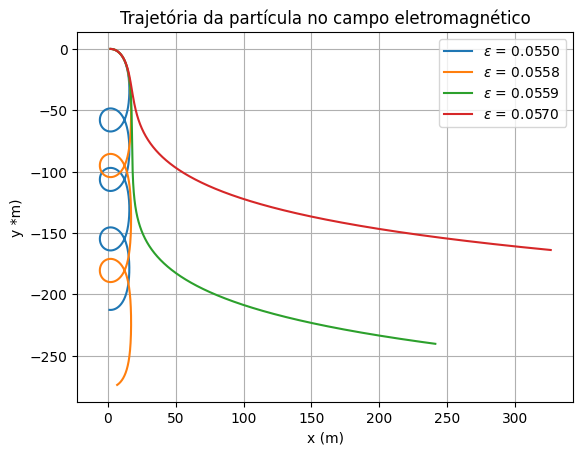

In [71]:
tf = 400 # Segundos
ts = np.linspace(ti,tf,N)
dt = ts[1]-ts[0]

epsilion_values = [0.0550, 0.0558, 0.0559, 0.0570]

for epsilon in epsilion_values:
    r = np.array([x,vx,y,vy], float)   
    x_points = []
    y_points = []
    x_points.append(r[0])
    y_points.append(r[2])

    for t in ts:
        r = R4Krel(r,t,dt, epsilon)
        x_points.append(r[0])
        y_points.append(r[2])
           
    plt.plot(x_points, y_points, label= rf'$\epsilon$ = ${epsilon:.4f}$')
    
plt.xlabel("x (m)")
plt.ylabel("y *m)")
plt.grid()
plt.title("Trajetória da partícula no campo eletromagnético")
plt.legend()
plt.show()

$\quad$ Assim como no caso não-relativístico, temos que para determinado valor de $\epsilon \geq \epsilon_0$, a trajetória de torna instável. Contudo, duas diferenças se tornam notáveis: a primeira é que essa instabilidade acontece para um valor de $\epsilon$ bem menor do que no caso não-relavitivístico, mesmo que as mesmas condições iniciais e condiguração dos campos tenham sido mantidas; a segunda é que essa instabilidade aparente ter uma natureza diferente da anterior. Percebe-se que a trajetória instável tanto 

$\quad$ Traçando um gráfico da força e da velocidade agora para umas das situações não divergentes, podemos confirmar uma natureza cíclica tanto para a força quanto para a velocidade. Escolhendo $\epsilon = 0.0550$ (trajetória em azul), desenvolvemos o código:

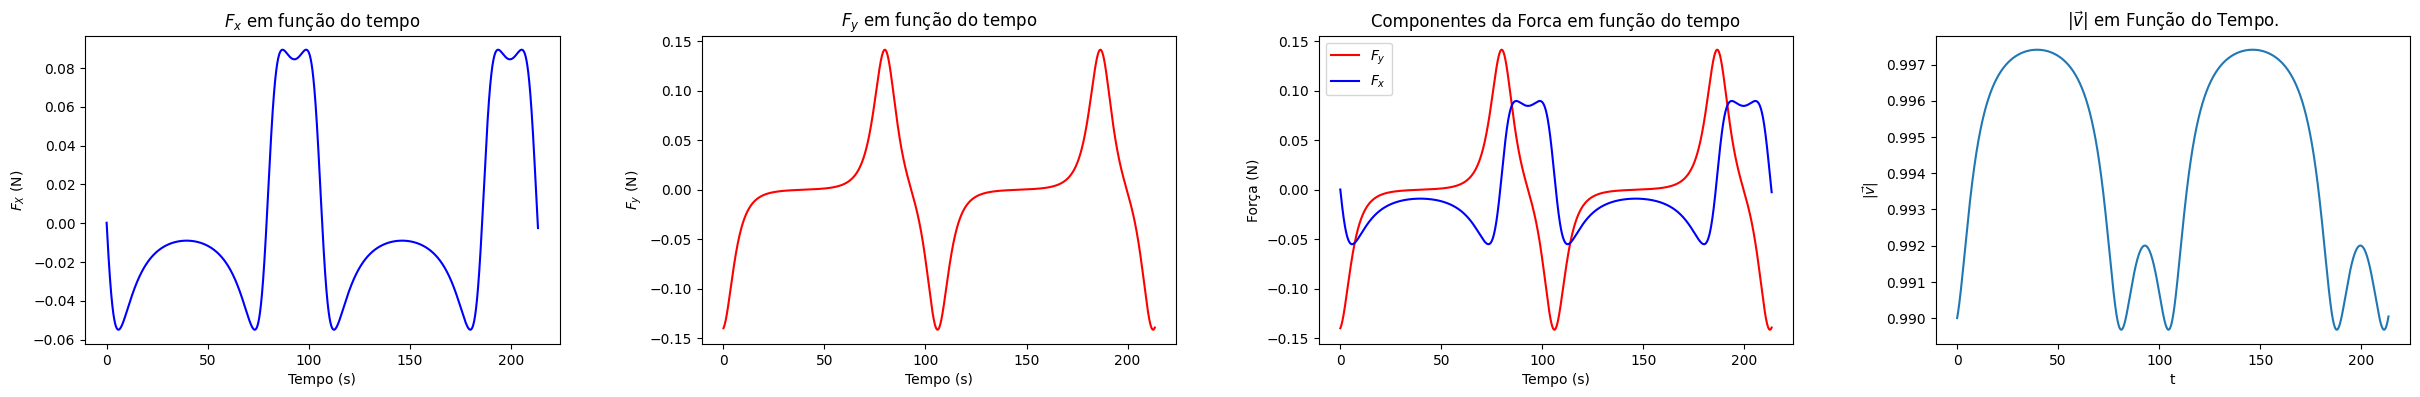

In [72]:
tf = 213.5 # Segundos
ts = np.linspace(ti,tf,N)
dt = ts[1]-ts[0]

epsilon = 0.0550

r = np.array([x,vx,y,vy], float)   

force_x_values = []
force_y_values = []
velocidade = []

for t in ts:
    r = R4Krel(r,t,dt,epsilon)

    vel = (r[1]**2 + r[3]**2)**(1/2)
    velocidade.append(vel)
    force_x_values.append(ForceRel(r, epsilon)[0])
    force_y_values.append(ForceRel(r, epsilon)[1])

fig, axes = plt.subplots(1, 4, figsize=(30, 4))  # 1 linha, 4 colunas

axes[0].plot(ts, force_x_values, color='b')
axes[0].set_title(f'$F_x$ em função do tempo')
axes[0].set_xlabel("Tempo (s)")
axes[0].set_ylabel(f'$F_X$ (N)')

axes[1].plot(ts, force_y_values, color='r')
axes[1].set_title(f'$F_y$ em função do tempo')
axes[1].set_xlabel("Tempo (s)")
axes[1].set_ylabel(f'$F_y$ (N)')

axes[2].plot(ts, force_y_values, color='r', label = f'$F_y$')
axes[2].plot(ts, force_x_values, color='b', label = f'$F_x$')
axes[2].set_title(f'Componentes da Forca em função do tempo')
axes[2].set_xlabel("Tempo (s)")
axes[2].legend()
axes[2].set_ylabel("Força (N)")

axes[3].plot(ts,velocidade)
axes[3].set_title(r'$|\vec{v}|$ em Função do Tempo.')
axes[3].set_xlabel('t')
axes[3].set_ylabel(r'$|\vec{v}|$')

plt.subplots_adjust(wspace=0.3)
plt.show()

$\quad$ Onde percebe-se que tanto a força quanto a velocidade oscilam com período $T \approx 100 \ s$.

## 3. Conclusão

$\quad$ Com todo essa análise percebemos que, mesmo com um campo elétrico não-constante definido de maneira simples, a trajetória da partícula já apresenta certa sensibilidade me relação ao parâmetro $\epsilon$ (utilizado para definir $\vec{E}$), ao mesmo tempo em que percebemos a imensa diferença entre a abordagem clássica e a relativística.

## Referências 

**[1]** https://pubs.aip.org/aip/pop/article/31/12/122118/3328945/Instability-of-motion-of-relativistic-charged?searchresult=1

**[2]** RESNICK, Robert. Introduction to special relativity. New York: John Wiley & Sons, 1968.